In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
result = np.zeros((180,600))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.HMXL.nc')
        plotvar = data.variables['HMXL'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        plotvar = plotvar[247:365,700:1300]
        aveplot = plotvar.mean(axis=0)
        
        result[i] = aveplot
        
        i = i + 1

In [4]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(330,338)]
i =0
result2 = np.zeros((8,600))

In [5]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/HMXL_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.nc')
        plotvar = data.variables['HMXL'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        plotvar = plotvar[247:365,700:1300]
        aveplot = plotvar.mean(axis=0)
        
        result2[i] = aveplot
        
        i = i + 1

In [6]:
dd = np.vstack((result,result2))

In [7]:
result3 = np.loadtxt("mixnew.out")

In [8]:
ddd = np.vstack((dd,result3))

In [9]:
A = np.arange(350)
B = np.arange(600)
xx, yy = np.meshgrid(B, A)

In [10]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([130,150,160,170,180,190,200,210,220,230,280]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0,200,300,400,500,600,700,800,900,1000,1100,1200]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


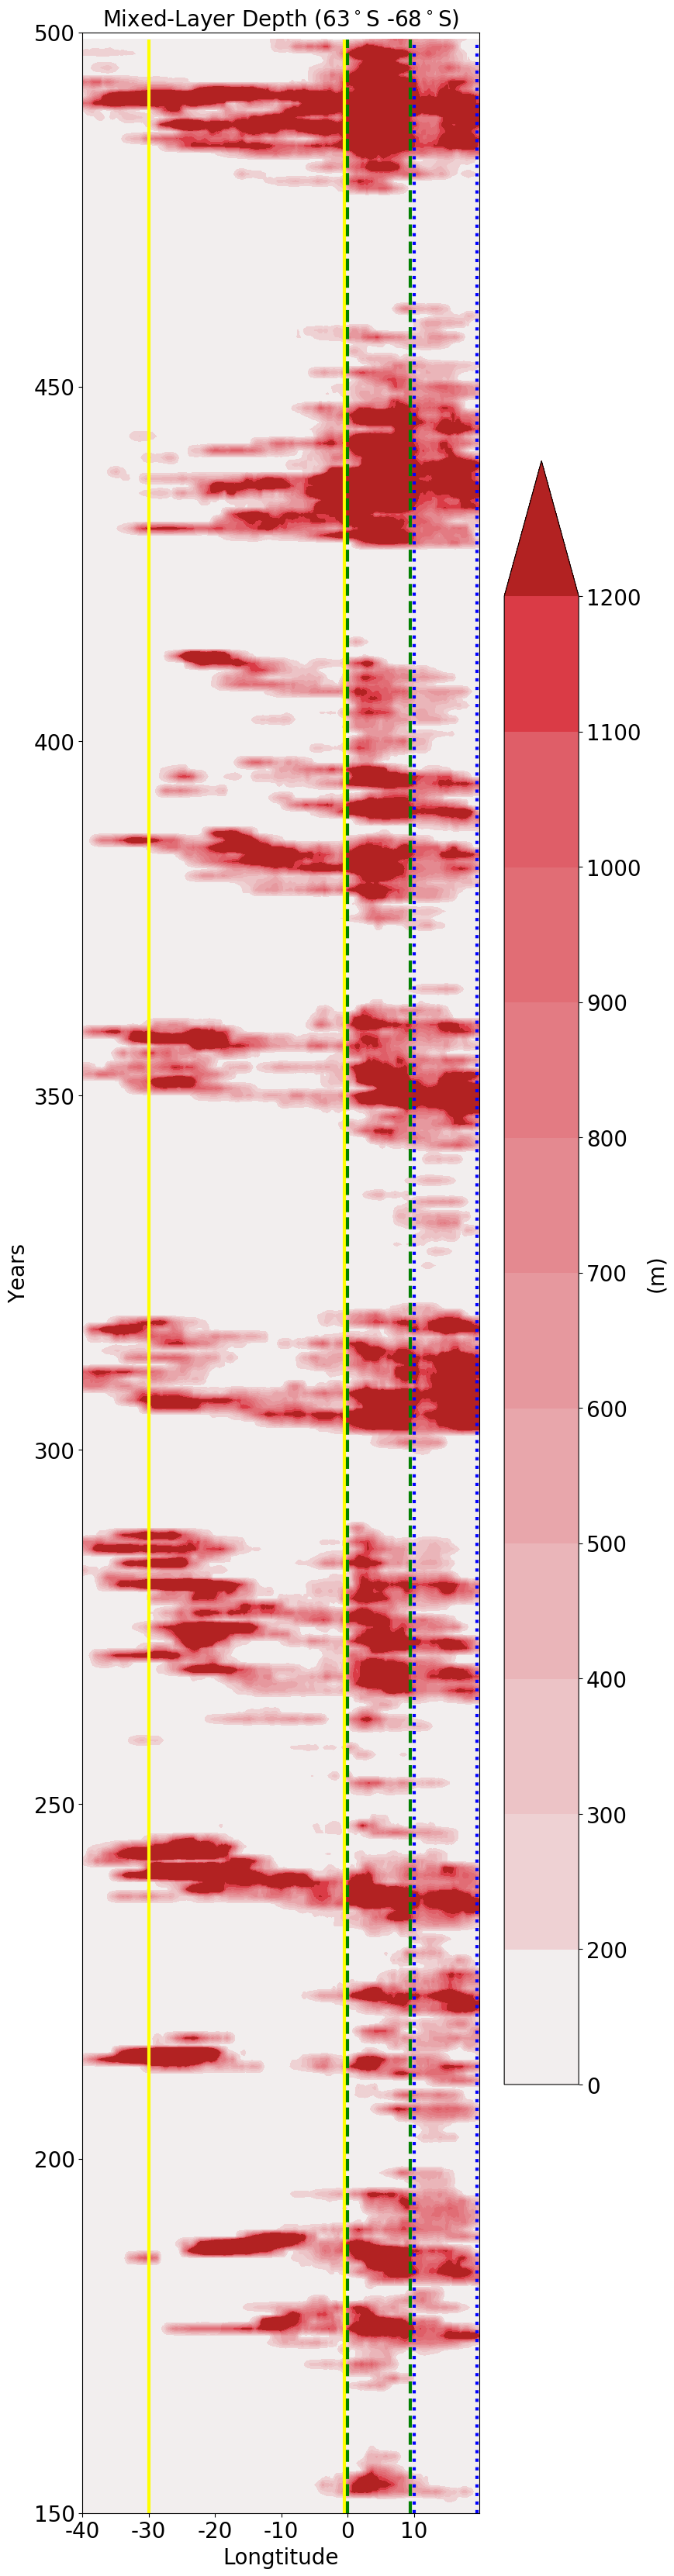

In [11]:
# plot the result
fig = plt.figure(figsize=(8, 40),dpi=100)
ax0 = fig.add_axes([0.15, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, ddd/100, cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')
im.cmap.set_over('firebrick')
cbar = fig.colorbar(im, ax=ax0,extendfrac='auto',ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(m)', **my_font)
ax0.set_title('Mixed Layer Depth')
#plt.hlines((27-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((39-20)*4, 0, 699, colors = "y",linestyles = "dashed")
###plt.hlines((56-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((69-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((94-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((106-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((120-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((138-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((168-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((203-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((252-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((261-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((300-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((326-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.vlines(430, 0, 159, colors = "b",linestyles = "dashed")
plt.vlines(100, 0, 349, colors = "yellow",linestyles = "solid",linewidth=3)
plt.vlines(395, 0, 349, colors = "yellow",linestyles = "solid",linewidth=3)


plt.vlines(400, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)
plt.vlines(495, 0, 349, colors = "green",linestyles = "dashed",linewidth=3)

plt.vlines(500, 0, 349, colors = "blue",linestyles = "dotted",linewidth=3)
plt.vlines(595, 0, 349, colors = "blue",linestyles = "dotted",linewidth=3)

#plt.vlines(700, 0, 349, colors = "purple",linestyles = 'dashdot',linewidth=3)
#plt.vlines(795, 0, 349, colors = "purple",linestyles = "dashdot",linewidth=3)
#############################################################################
##设定X坐标值
plt.xticks(range(0,600,100), ['-40','-30', '-20', '-10', '0','10','20'],**my_font)
#plt.yticks(range(0,181,10), ['150','160','170',\
#                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.yticks(range(0,351,50), ['150', '200', '250', '300', '350','400','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Mixed-Layer Depth (63$^\circ$S -68$^\circ$S)',**my_font)
plt.savefig("mixnew.png",bbox_inches='tight',dpi=fig.dpi)

In [12]:
np.savetxt('mixplot.out',ddd)